In [ ]:
#importing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import LabelEncoder
import matplotlib.mlab as mlab
%matplotlib inline


In [ ]:
#loading the data

uploaded = files.upload()
d=pd.read_csv("data1.csv")
d.head(5)

Saving data1.csv to data1.csv


,Classification,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,M,51,18.370000,105,6.030,1.561770,9.6200,12.760000,3.21000,513.660
1,M,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460
2,B,66,31.238590,82,4.181,0.845677,16.2247,4.267105,3.29175,634.602
3,B,47,22.030000,84,2.869,0.590000,26.6500,38.040000,3.32000,191.720
4,B,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786


In [ ]:
d.isna().sum()

Classification    0
Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
dtype: int64

In [ ]:
d.shape

(116, 10)

In [ ]:
d

,Classification,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,M,51,18.370000,105,6.030,1.561770,9.6200,12.760000,3.21000,513.660
1,M,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460
2,B,66,31.238590,82,4.181,0.845677,16.2247,4.267105,3.29175,634.602
3,B,47,22.030000,84,2.869,0.590000,26.6500,38.040000,3.32000,191.720
4,B,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
...,...,...,...,...,...,...,...,...,...,...
111,M,71,27.915519,104,18.200,4.668907,53.4997,1.656020,49.24184,256.001
112,M,48,31.250000,199,12.162,5.969920,18.1314,4.104105,53.63080,1698.440
113,M,42,29.296875,98,4.172,1.008511,12.2617,6.695585,53.67170,1041.843
114,M,85,27.688778,196,51.814,25.050342,70.8824,7.901685,55.21530,1078.359


In [ ]:
d['Classification'].value_counts()

M    64
B    52
Name: Classification, dtype: int64

In [ ]:
d.dtypes

Classification     object
Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
d.iloc[:,0] = l.fit_transform(d.iloc[:,0].values)  #iloc[rows,columns]

In [ ]:
d

,Classification,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,1,51,18.370000,105,6.030,1.561770,9.6200,12.760000,3.21000,513.660
1,1,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460
2,0,66,31.238590,82,4.181,0.845677,16.2247,4.267105,3.29175,634.602
3,0,47,22.030000,84,2.869,0.590000,26.6500,38.040000,3.32000,191.720
4,0,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
...,...,...,...,...,...,...,...,...,...,...
111,1,71,27.915519,104,18.200,4.668907,53.4997,1.656020,49.24184,256.001
112,1,48,31.250000,199,12.162,5.969920,18.1314,4.104105,53.63080,1698.440
113,1,42,29.296875,98,4.172,1.008511,12.2617,6.695585,53.67170,1041.843
114,1,85,27.688778,196,51.814,25.050342,70.8824,7.901685,55.21530,1078.359


# DATA VISUALISATION

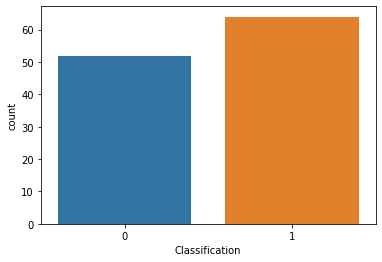

In [ ]:
sns.countplot(x='Classification',data=d)

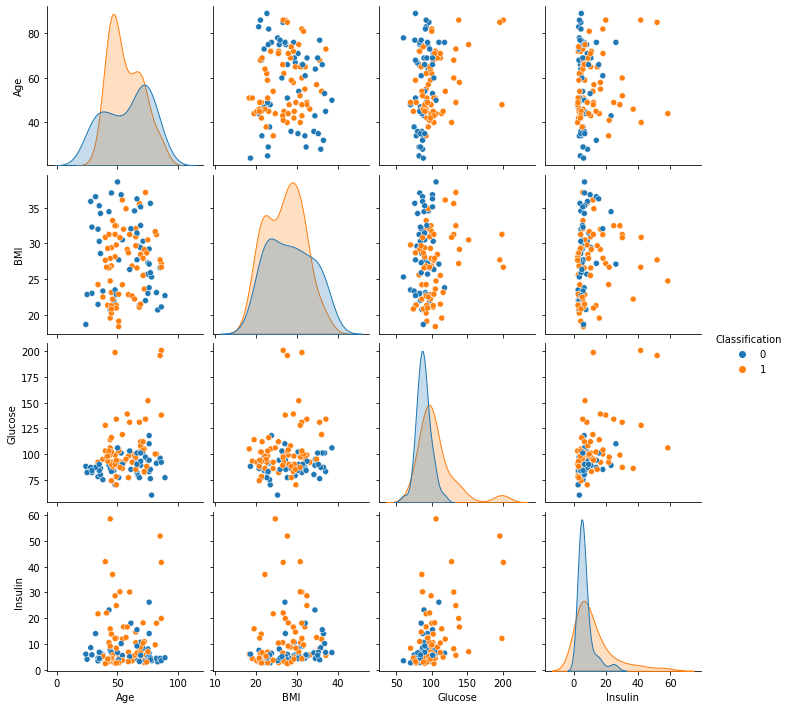

In [ ]:
sns.pairplot(d.iloc[:,0:5],hue='Classification')

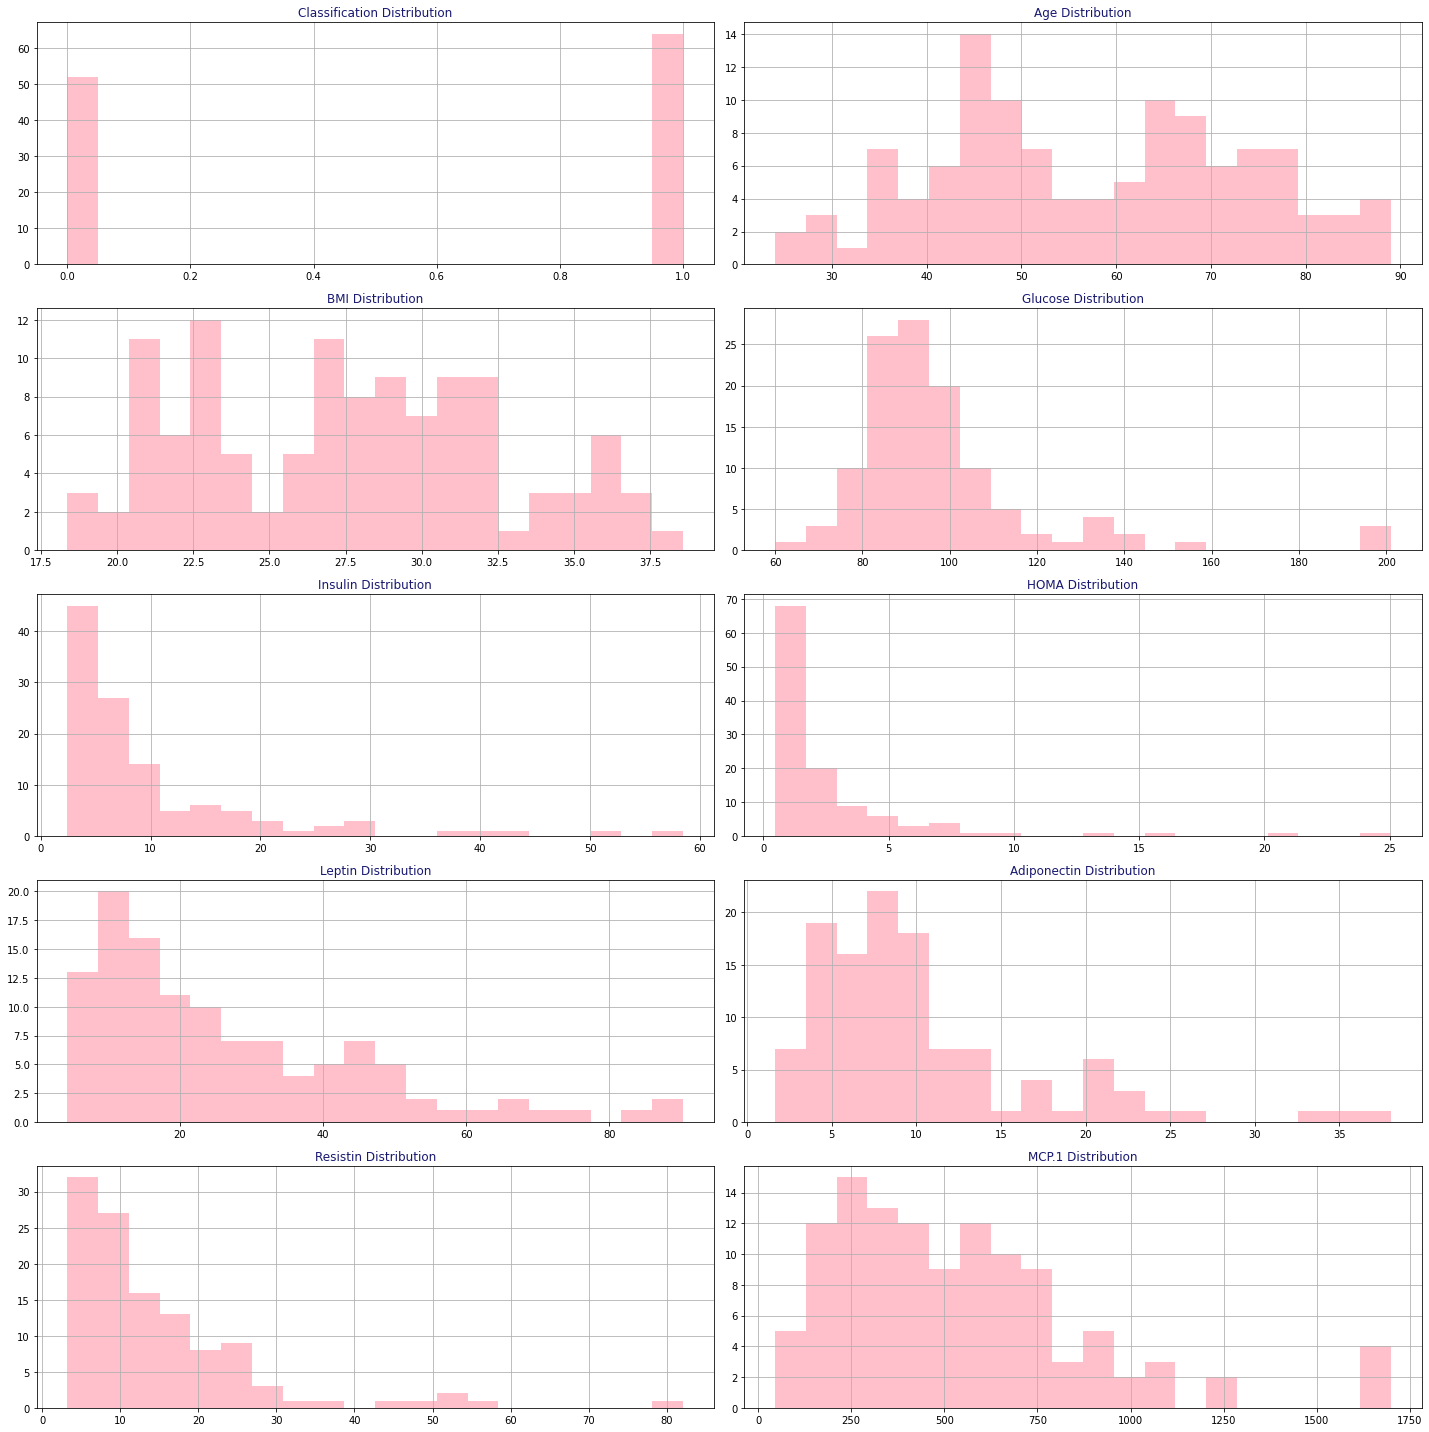

In [ ]:
def draw_histogram(df, features, rows, cols):
  fig = plt.figure(figsize=(20,20))
  for i, feature in enumerate(features):
    ax = fig.add_subplot(rows,cols,i+1)
    df[feature].hist(bins=20,ax=ax,facecolor='pink') 
    ax.set_title(feature + " Distribution",color='midnightblue')
  fig.tight_layout()
  plt.show()
  print('\n\n')
draw_histogram(d,d.columns,5,2)

In [ ]:
#Splitting the dataset into independent and dependent datasets
X = d.iloc[:,1:].values      #Independent Set 
Y = d.iloc[:,0].values       #Dependent Set

In [ ]:
#Splitting datasets into training(85%) and testing(15%)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [ ]:
#Scaling the data(feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
X_train

array([[-5.72004876e-01, -1.24893195e+00, -9.25641003e-01,
        -7.63843327e-01, -6.21177545e-01, -1.07364092e+00,
        -9.40825395e-01,  6.97223517e-01,  6.73321633e-01],
       [ 6.70932548e-01,  1.72054533e-01,  4.71373652e-01,
        -1.83568730e-01, -1.45717404e-01, -6.46908746e-01,
        -7.43134517e-01,  1.75940769e-01, -5.16129299e-01],
       [ 3.60198192e-01, -1.07731523e+00,  5.70210063e-03,
        -4.75963906e-01, -3.96200511e-01, -7.76633379e-01,
        -8.14213433e-01, -3.17364958e-02, -3.84804879e-01],
       [-8.20592360e-01, -1.26169684e+00,  1.91970721e-01,
         2.90961923e-01,  1.48765974e-01, -1.00701885e+00,
         1.48052826e+00,  7.04613144e-01,  9.97279781e-02],
       [-1.26830349e-02,  3.14631508e-01,  1.91495546e+00,
         5.47795524e-01,  7.17775174e-01, -2.34107518e-01,
        -4.16194374e-02, -2.67686385e-02,  1.24996862e+00],
       [ 4.84491934e-01,  2.25763658e-02, -3.66835141e-01,
        -4.43789147e-01, -4.05654293e-01, -1.348311

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = classifier.predict(X_test)

[[6 2]
 [3 7]]


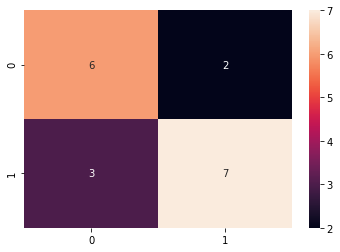

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test,predictions)
print(cm)
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predictions))
print('Accuracy of this prediction model is {0:.2f}%'.format(accuracy_score(Y_test,predictions)*100))

0.7222222222222222
Accuracy of this prediction model is 72.22%


In [ ]:
print(Y_test)

[1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1]


In [ ]:
print(predictions)

[1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1]
